## Simple Linear Regression

### Import Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
%matplotlib inline

/Users/konoharuki/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Generate True Data

In [2]:
size = 100

In [3]:
alpha = 3
beta = 5
sigma = 3

In [4]:
X = np.random.randn(size)

In [5]:
mu = alpha + X * beta

In [6]:
y = mu + np.random.randn(size) * sigma

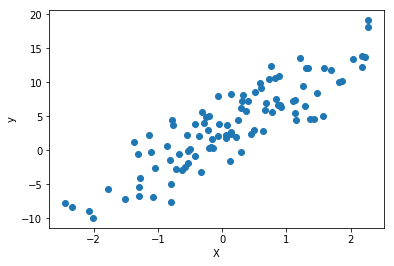

In [7]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Make Model

In [8]:
model = pm.Model()

In [9]:
with model:
    alpha = pm.Normal("alpha", mu=0, sd=100)
    beta = pm.Normal("beta", mu=0, sd=100)
    sigma = pm.HalfNormal("sigma", sd=1)
    
    mu = alpha + beta * X
    y_obs = pm.Normal("y_obs", mu=mu, sd=sigma, observed=y)

### Find the parameters where the posterior probabirity is mazimized

In [10]:
map_estimate = pm.find_MAP(model=model)

logp = -263.41, ||grad|| = 0.0095055: 100%|██████████| 22/22 [00:00<00:00, 1051.78it/s]  


In [11]:
map_estimate

{'alpha': array(2.98186552),
 'beta': array(4.98018859),
 'sigma': array(2.78640266),
 'sigma_log__': array(1.0247514)}

### Sampling

In [12]:
with model:
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/konoharuki/anaconda/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_log__, beta, alpha]
100%|██████████| 10500/10500 [00:22<00:00, 472.36it/s]


### Result

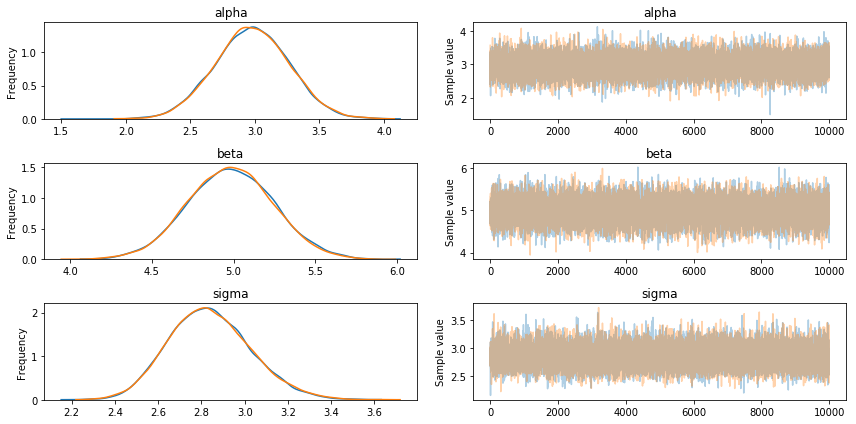

In [13]:
_ = pm.traceplot(trace)

In [14]:
summary = pm.summary(trace)

In [15]:
summary

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,2.976953,0.287807,0.002169,2.407624,3.532489,20000.0,0.999958
beta,4.981437,0.262974,0.001566,4.482338,5.512714,20000.0,0.999974
sigma,2.840321,0.188616,0.001230,2.491247,3.222728,20000.0,0.999957


In [16]:
X_test = np.linspace(start=-3, stop=3, num=100)
y_test = summary["mean"]["alpha"] + summary["mean"]["beta"] * X_test
y_true = 3 + 5 * X_test

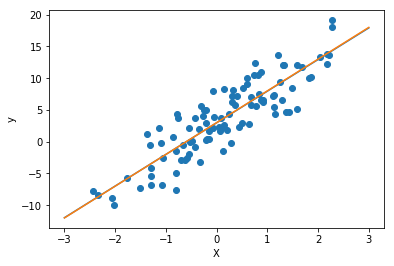

In [17]:
plt.scatter(X, y)
plt.plot(X_test, y_test)
plt.plot(X_test, y_true)
plt.xlabel("X")
plt.ylabel("y")
plt.show()